# Five-arm Antenna Position Calibration

Author: Tim Molteno. tim@elec.ac.nz.

The antennas are laid out on three arms which are placed approximately 120 degrees apart.  This notebook will use measurements to infer the actual layout of the antennas.

Arm 1 will point geographically north (NOT magnetic). This arm forms the y-axis and will be used as a reference. We will assume that the x positions along this arm are approximately zero.

The other reference point is the center of the array. This is assumed to be the point [0,0]. Make sure that a marker is present at this reference point at the same height as the level of the antennas (otherwise the distances will be wrong).

In [1]:
import numpy as np
from scipy.optimize import minimize 

In [2]:
x0 = [0,0]

In [3]:
# pip install pandas
# pip install odfpy

import pandas as pd

#pd.read_excel('three_arm_measurements.ods', engine='odf')
cols = [f"A {i}" for i in range(24)]
data = pd.read_excel('antenna_measurements.ods', "Sheet1", usecols=cols)
radius = data.loc[0]
radius

A 0      695.0
A 1     2555.0
A 2     1120.0
A 3     2045.0
A 4     1730.0
A 5     1813.0
A 6     2575.0
A 7      260.0
A 8      565.0
A 9      943.0
A 10    2565.0
A 11     680.0
A 12    1530.0
A 13    1204.0
A 14    1944.0
A 15     875.0
A 16    2570.0
A 17     350.0
A 18    2285.0
A 19    1280.0
A 20    2530.0
A 21    2233.0
A 22    1810.0
A 23    1283.0
Name: 0, dtype: float64

## Finding the antennas

This is done by measuring the distance from each antenna to x0 as well as each other antenna. The distance $m_0$ are the measurements to $x_0$. The array m_ij are the distances between antennas.

In [4]:
n_ant = 24
m_0 = np.zeros(24)
m_ij = np.zeros((24,24))

radius = data.loc[0]

for i in range(24):
    m_ij[i,:] = data.loc[i+1]

The following are the measured distances from [x1, x0, x2] from the reference points in millimeters. Note that their order must be the same as the order of the variable called 'reference_points'. In this case, they are x1,x0,x2.

In [5]:
for i in range(n_ant):
    for j in range(n_ant):
        if not np.isnan(m_ij[i,j]):
            m_ij[j,i] = m_ij[i,j]

m_ij


array([[   0., 1855.,  419., 1345., 1030., 1732., 2448.,  665.,  748.,
         985., 3157., 1310., 2135., 1822., 2543., 1495., 3165., 1005.,
        2883., 1890., 2402., 2120., 1724., 1253.],
       [1855.,   nan,   nan,   nan,   nan,   nan, 3018.,   nan,   nan,
          nan, 4872.,   nan,   nan,   nan,   nan,   nan, 4879.,   nan,
          nan,   nan, 2975.,   nan,   nan,   nan],
       [ 419.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
        3255.,   nan,   nan,   nan,   nan,   nan],
       [1345.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan],
       [1030.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan, 3495.,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan],
       [1732.,   nan,   nan,   nan,

## Plot the Initial Guess Points

Initial Guesses are from JSON queried from the telescope API. These are converted to millimeters.

In [6]:
import json

global_rot_degrees = -33.4

if True:
    with open('rhodes_24_opt.json', "r") as f:
        data = f.read()
    cal_json = json.loads(data)
    print(cal_json)
    arm_angles = np.radians(cal_json['arm_degrees'])
    narms = cal_json['num_arms']
    arms = cal_json['arms']
    current_pos = []
    for arm_angle,arm in zip(arm_angles, arms):
        print(arm_angle, arm)
        r = np.array(arm)
        arm_y = r*np.cos(arm_angle + np.radians(global_rot_degrees))
        arm_x = r*np.sin(arm_angle + np.radians(global_rot_degrees))
        for x,y in zip(arm_x, arm_y):
            current_pos.append([x,y])
    current_pos = np.array(current_pos)




{'C/N': 2.158123728118006, 'arm_degrees': [0.0, 72.0, 144.0, 216.0, 288.0], 'arms': [[0.6529630237476174, 2.504432694886343, 1.073494591195416, 2.0005486285280463, 1.693181081287429], [1.7817801673973575, 2.5479706468791354, 0.24027311461115142, 0.5448087496619634, 0.9209845465458897], [2.54993417924799, 0.7030967569347759, 1.5336789571128613, 1.2116849949441444, 1.932751799958924], [0.8609740214161916, 2.5468131744184697, 0.3521255703988069, 2.2409579872406376, 1.2609873402646041], [2.4973866033909307, 2.191993817667368, 1.7956789837968319, 1.2717328395565333]], 'entropy': 3.8594732373100027, 'fov_degrees': 160.0, 'num_arms': 5, 'penalty': 0.05830674870939684, 'radius': 2.55, 'radius_lower': 0.20000000298023224, 'res_arcmin': 180.0, 'spacing': 0.30000001192092896}
0.0 [0.6529630237476174, 2.504432694886343, 1.073494591195416, 2.0005486285280463, 1.693181081287429]
1.2566370614359172 [1.7817801673973575, 2.5479706468791354, 0.24027311461115142, 0.5448087496619634, 0.9209845465458897]
2

-359.4435685607249 545.1247851657114
-1378.6419633740938 2090.820284012879
-590.9380970384922 896.2046656843172
-1101.2634896081418 1670.153747881178
-932.0635747250169 1413.5486078308345
1111.616292260646 1392.4976781708647
1589.6268996023089 1991.2912236582652
149.90149384371327 187.77835804044804
339.89506302285065 425.77919141372354
574.5834674746267 719.7682779069753
2386.8902039918135 -897.1730449501032
658.1404238759441 -247.3787219479315
1435.6148125676978 -539.612132394193
1134.209293829296 -426.3212459683905
1809.1707525682154 -680.0225792547024
-39.056354313098346 -860.087708749136
-115.53105579857146 -2544.1914079993176
-15.973468070007693 -351.76308169917655
-101.65655057335285 -2238.6510773908326
-57.20215374756218 -1259.6892418030095
-2407.71894692503 -663.1962902600652
-2113.2911657226914 -582.0973677748349
-1731.2058557583025 -476.8535391897455
-1226.0717860300485 -337.7164353531081


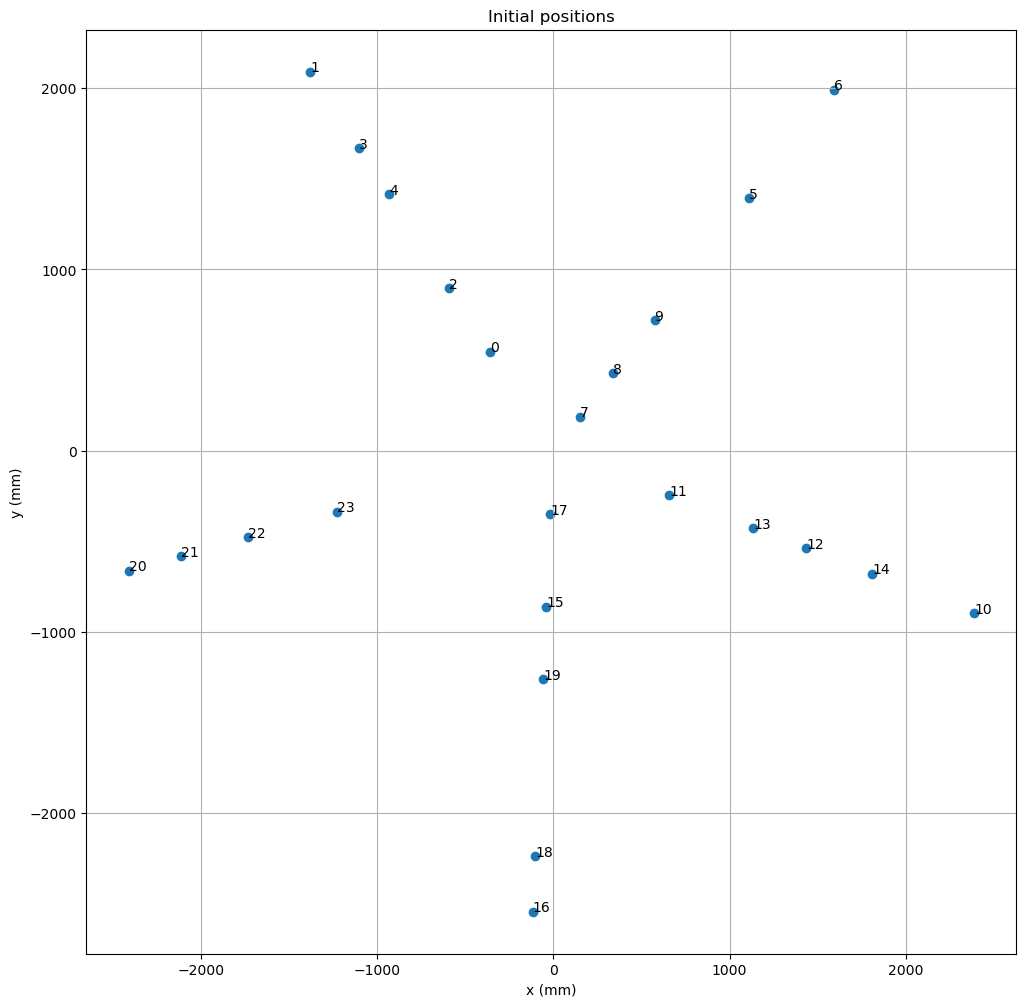

In [7]:
def i_y(i):
    return 2*i+1

def i_x(i):
    return 2*i


initial_guess = np.zeros(2*n_ant)

for i in range(n_ant):
    x,y = current_pos[i][0:2]*1000
    initial_guess[i_x(i)] = x
    initial_guess[i_y(i)] = y
    
    print(x,y)
initial_guess

pos_i = current_pos*1000
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(pos_i[:,0], pos_i[:,1])
for i in range(0,pos_i.shape[0]):
    ax.text(pos_i[i,0], pos_i[i,1],f"{i}")

ax.grid(True)
ax.set_title('Initial positions')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.savefig('initial_positions.png')
plt.show()

## Criteria for Optimality

The function below is minimized when the positions (in variable x) are consistent with the measured distances m[i,j]. The initial value of this function is more than 3 million.

Note that the x input is a 1D vector of with 48 entries as [p0.x, p0.y, p1.x, p1.y]

In [8]:
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)


def p(x, i):
    return [x[i_x(i)],x[i_y(i)]]

max_err = 1200
def bounds():
    ret = [(0,0)]*48
    for i in range(24):
        _x,_y = pos_i[i,0], pos_i[i,1]
        ret[i_x(i)] = (_x - max_err, _x + max_err)
        ret[i_y(i)] = (_y - max_err, _y + max_err)
    # x-component of the north arm set to zero.
    #for i in [0,1,2,3,4]:
    #    xval = pos_i[i,0]
    #    ret[i_x(i)] = ( - 2, + 2)
    
    return ret

bnd = bounds()

center = [0,0]

def radius_model(x):
    ret = []
    
    for i in range(n_ant):
        p_i = p(x,i)
        ret.append(dist(center, p_i))
        
    return np.array(ret)

non_nan_ij = []
non_nan_indices = []
for i in range(n_ant):
    for j in range(n_ant):
        if not np.isnan(m_ij[i,j]):
            non_nan_ij.append(m_ij[i,j])
            non_nan_indices.append([i,j])
non_nan_ij = np.array(non_nan_ij)
non_nan_indices = np.array(non_nan_indices)

def m_ij_model(x):
    ret = []
    for i in range(n_ant):
        p_i = p(x,i)

        for j in range(n_ant):
            p_j = p(x,j)
            if not np.isnan(m_ij[i,j]):
                ret.append(dist(p_j, p_i))
                
    return np.array(ret)
    
def radius_residual(x):
    predict = radius_model(x)
    return predict - radius

def m_ij_residual(x):
    predict = m_ij_model(x)
    return predict - non_nan_ij


def f(x):
    ret = 0
    for i in range(n_ant):
        p_i = p(x,i)
        ret += (dist(center, p_i) - m_0[i])**2
        for j in range(n_ant):
            p_j = p(x,j)
            if not np.isnan(m_ij[i,j]):
                ret += (dist(p_j, p_i) - m_ij[i,j])**2
    return ret

def f(x):
    # This is the final criterion for optimality. The sum of squared residuals.
    ret = np.sum(radius_residual(x)**2)
    ret += np.sum(m_ij_residual(x)**2)
    return ret

print(f(initial_guess))

155907.24874903046


We can see that the initial value of this optimality condition is about 600,000.

In [9]:
res = minimize(f, initial_guess, bounds=bnd)
res

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 98.6178339491941
        x: [-3.852e+02  5.837e+02 ... -1.239e+03 -3.335e+02]
      nit: 175
      jac: [ 9.550e-04 -1.563e-04 ...  7.248e-05 -4.221e-04]
     nfev: 9212
     njev: 188
 hess_inv: <48x48 LbfgsInvHessProduct with dtype=float64>

In [10]:
err = res.jac.reshape((24,2))
rms = err # np.sqrt(np.sum(err**2, axis=1))
for i in range(24):
    print(f"Ant {i}:\tJac: {rms[i,0]:06.2f}, \t{rms[i,1]:06.2f}")

Ant 0:	Jac: 000.00, 	-00.00
Ant 1:	Jac: -00.00, 	-00.00
Ant 2:	Jac: -00.00, 	-00.00
Ant 3:	Jac: -00.00, 	000.00
Ant 4:	Jac: -00.00, 	-00.00
Ant 5:	Jac: -00.00, 	-00.00
Ant 6:	Jac: -00.00, 	-00.00
Ant 7:	Jac: -00.00, 	000.00
Ant 8:	Jac: -00.00, 	-00.00
Ant 9:	Jac: -00.00, 	000.00
Ant 10:	Jac: 000.00, 	000.00
Ant 11:	Jac: -00.00, 	-00.00
Ant 12:	Jac: -00.00, 	-00.00
Ant 13:	Jac: -00.00, 	-00.00
Ant 14:	Jac: -00.00, 	000.00
Ant 15:	Jac: -00.00, 	000.00
Ant 16:	Jac: -00.00, 	000.00
Ant 17:	Jac: -00.00, 	000.00
Ant 18:	Jac: -00.00, 	-00.00
Ant 19:	Jac: -00.00, 	-00.00
Ant 20:	Jac: 000.00, 	-00.00
Ant 21:	Jac: -00.00, 	000.00
Ant 22:	Jac: -00.00, 	000.00
Ant 23:	Jac: 000.00, 	-00.00


The optimized positions are now known. The final value of the function is 32. Far closer to zero than 3 million!

We can recover the x,y coordinates by reshaping the array

In [11]:
pos = res.x.reshape((24,2))
pos

array([[ -385.23535563,   583.71980502],
       [-1414.19500711,  2129.71571125],
       [ -628.22989202,   925.76558187],
       [-1125.510398  ,  1706.91716867],
       [ -955.34464269,  1441.80031675],
       [ 1134.83900098,  1413.89889318],
       [ 1600.82915414,  2016.45444738],
       [  160.87102854,   204.25610857],
       [  349.57511419,   443.87170783],
       [  587.69007093,   737.47525233],
       [ 2402.12002447,  -899.97014241],
       [  638.69136117,  -233.3938101 ],
       [ 1433.74730393,  -534.10331638],
       [ 1118.99050161,  -444.38045271],
       [ 1820.52717994,  -681.77108729],
       [  -51.25847859,  -873.49792439],
       [ -120.13401569, -2570.67800934],
       [  -12.89705874,  -349.76241433],
       [  -84.18497165, -2283.47592031],
       [  -62.28388727, -1278.48380242],
       [-2438.743206  ,  -664.21447577],
       [-2155.71922604,  -582.37892052],
       [-1746.9401402 ,  -473.60491905],
       [-1238.90116684,  -333.48474478]])

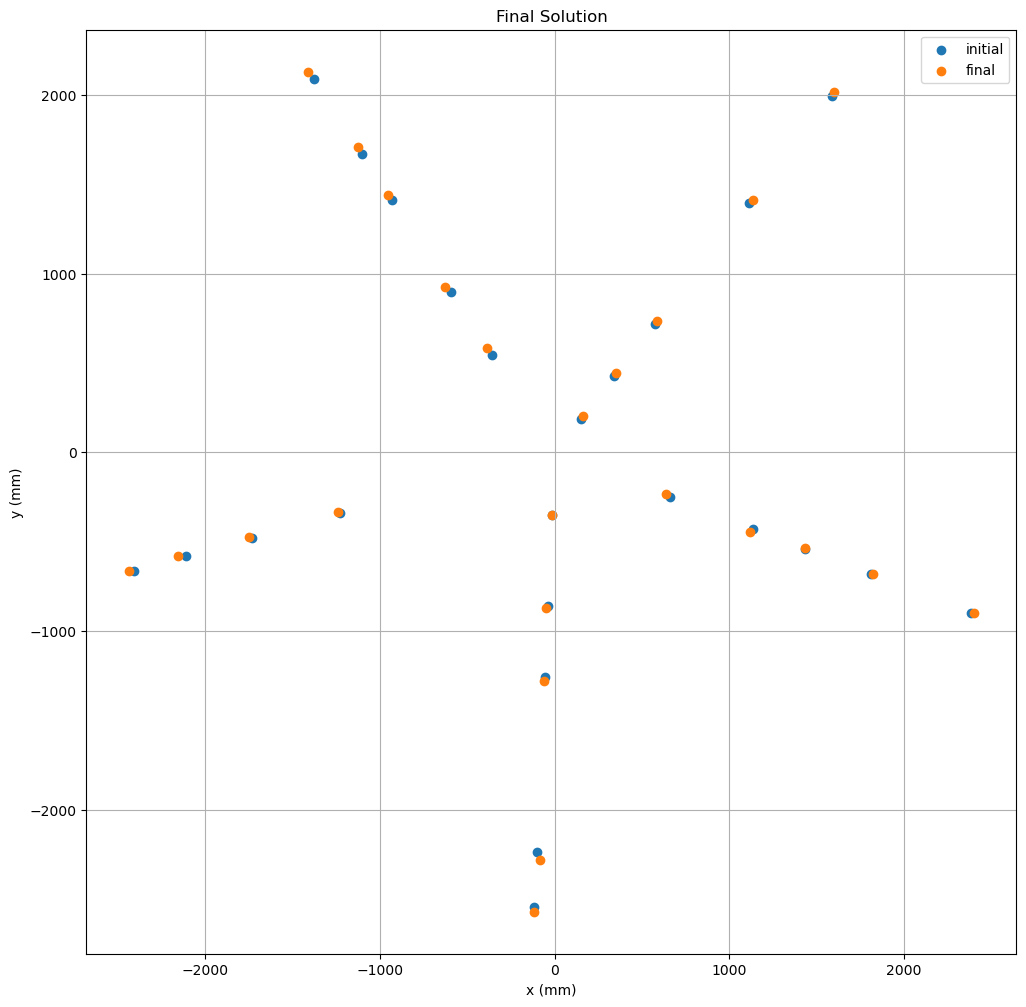

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(pos_i[:,0], pos_i[:,1], label='initial')
ax.scatter(pos[:,0], pos[:,1], label='final')

ax.grid(True)
ax.set_title('Final Solution')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.legend()
plt.savefig('final_positions.png')
plt.show()

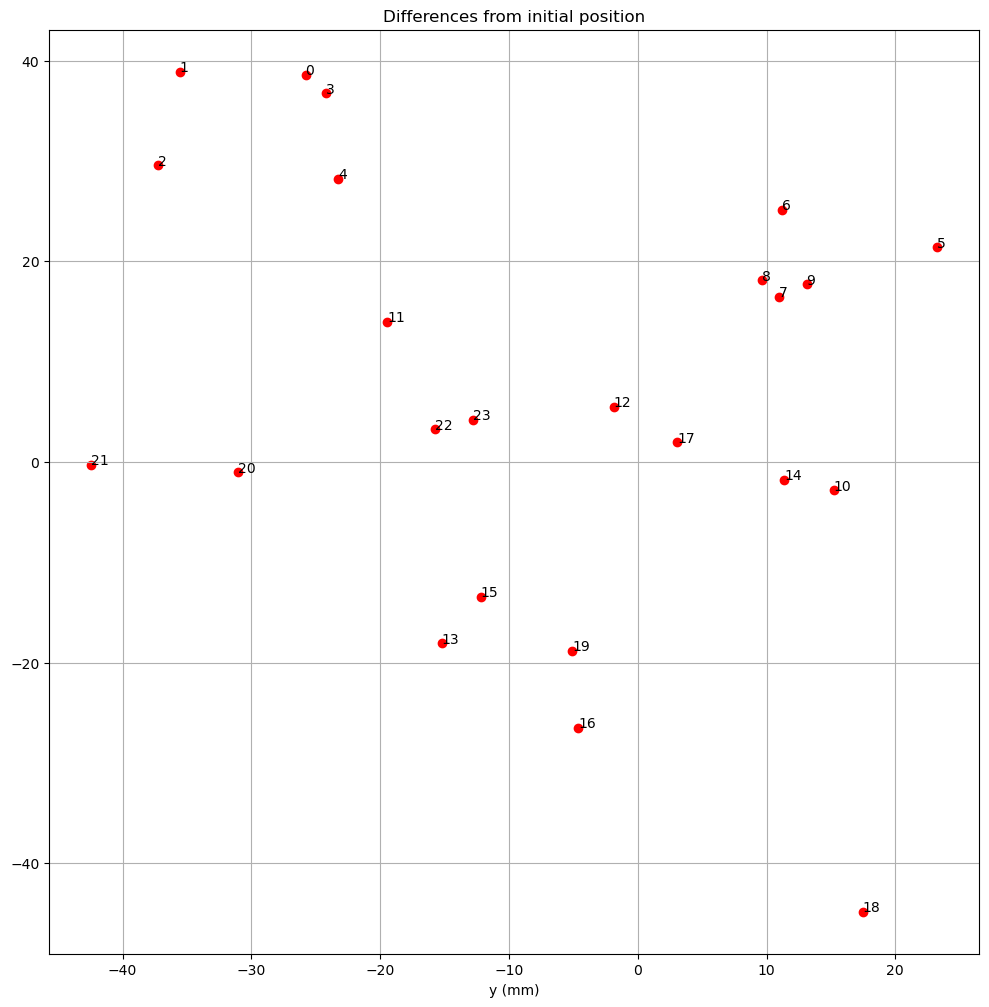

In [13]:
# Differences plot
diff = pos - pos_i[:,0:2]


fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(diff[:,0], diff[:,1], color='red')

for i in range(0,diff.shape[0]):
    ax.text(diff[i,0], diff[i,1],f"{i}")

ax.grid(True)
ax.set_title("Differences from initial position")
ax.set_xlabel('x (mm)')
ax.set_xlabel('y (mm)')
plt.savefig('differences.png')
plt.show()

In [14]:
# Residual plot
rres = radius_residual(res.x)
rres

A 0     4.381934
A 1     1.489102
A 2    -1.199433
A 3    -0.412052
A 4    -0.412899
A 5     0.000176
A 6    -0.365556
A 7     0.000088
A 8    -0.000130
A 9     0.000195
A 10    0.175797
A 11   -0.000496
A 12   -0.000757
A 13   -0.000943
A 14   -0.001279
A 15    0.000603
A 16    3.483555
A 17    0.000115
A 18    0.027218
A 19    0.000045
A 20   -2.422248
A 21    0.000356
A 22    0.000407
A 23   -0.000321
Name: 0, dtype: float64

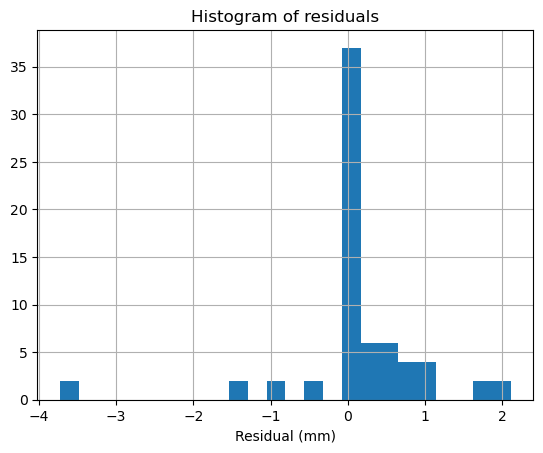

In [15]:
# ij resdual
ijres = m_ij_residual(res.x)
plt.hist(ijres, bins='fd');
plt.title("Histogram of residuals")
plt.xlabel("Residual (mm)")
plt.grid(True)
plt.savefig("residual_histogram.png")

The API expects 3D coordinates (with a z value which is zero in this case). Therefore we add a column of zeros.

In [16]:
absres = np.abs(ijres)
p95 = np.percentile(absres, 95)

print(f"95th percentile of residuals is {p95:4.2f} mm")
ijres_matrix = np.zeros_like(m_ij)
for r, i, j in zip(ijres, non_nan_indices[:,0], non_nan_indices[:,1]):
    if np.abs(r) > p95:
        print(f" res[{i},{j}] = {r:3.1f}")
    ijres_matrix[i,j] = r
    


95th percentile of residuals is 1.97 mm
 res[0,1] = 2.1
 res[1,0] = 2.1
 res[1,16] = -3.7
 res[16,1] = -3.7


## Output best estimates

Write some json files...

In [17]:
result = np.zeros((n_ant, 3))
result[:,:-1] = np.round(pos/1000.0, 3)
result

array([[-0.385,  0.584,  0.   ],
       [-1.414,  2.13 ,  0.   ],
       [-0.628,  0.926,  0.   ],
       [-1.126,  1.707,  0.   ],
       [-0.955,  1.442,  0.   ],
       [ 1.135,  1.414,  0.   ],
       [ 1.601,  2.016,  0.   ],
       [ 0.161,  0.204,  0.   ],
       [ 0.35 ,  0.444,  0.   ],
       [ 0.588,  0.737,  0.   ],
       [ 2.402, -0.9  ,  0.   ],
       [ 0.639, -0.233,  0.   ],
       [ 1.434, -0.534,  0.   ],
       [ 1.119, -0.444,  0.   ],
       [ 1.821, -0.682,  0.   ],
       [-0.051, -0.873,  0.   ],
       [-0.12 , -2.571,  0.   ],
       [-0.013, -0.35 ,  0.   ],
       [-0.084, -2.283,  0.   ],
       [-0.062, -1.278,  0.   ],
       [-2.439, -0.664,  0.   ],
       [-2.156, -0.582,  0.   ],
       [-1.747, -0.474,  0.   ],
       [-1.239, -0.333,  0.   ]])

In [18]:
json_result = {}
json_result["antenna_positions"] = result.tolist()
print(json.dumps(json_result, indent=4, separators=(',', ': ')))

{
    "antenna_positions": [
        [
            -0.385,
            0.584,
            0.0
        ],
        [
            -1.414,
            2.13,
            0.0
        ],
        [
            -0.628,
            0.926,
            0.0
        ],
        [
            -1.126,
            1.707,
            0.0
        ],
        [
            -0.955,
            1.442,
            0.0
        ],
        [
            1.135,
            1.414,
            0.0
        ],
        [
            1.601,
            2.016,
            0.0
        ],
        [
            0.161,
            0.204,
            0.0
        ],
        [
            0.35,
            0.444,
            0.0
        ],
        [
            0.588,
            0.737,
            0.0
        ],
        [
            2.402,
            -0.9,
            0.0
        ],
        [
            0.639,
            -0.233,
            0.0
        ],
        [
            1.434,
            -0.534,
            0.0
   

The position file above is in a format suitable for uploading to the telescope api. Also for using as the calibrated_antenna_positions.json file in TART/software/containers/telescope_web_api/config_data.


    tart_upload_antenna_positions --api https://tart.elec.ac.nz/rhodes --pw=xxxx --file rhodes_antenna_positions.json
